## Import Libraries

In [3]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs

Cloning into 'german-traffic-signs'...
Unpacking objects: 100% (6/6), done.


In [4]:
!ls german-traffic-signs

signnames.csv  test.p  train.p	valid.p


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.models import Model
from keras.utils.np_utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten
from keras.layers import Input, Activation
from keras.layers import BatchNormalization
from keras.layers.merge import concatenate
from tensorflow.keras.utils import plot_model
import cv2
import pickle
from sklearn.model_selection import train_test_split
import os
import pandas as pd
import random
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image

In [6]:
np.random.seed(0)


##  Paths and Parameters

In [7]:
path = r'D:\Study_3\GTSRB_new'
labelFile = r'D:\Study_3\GTSRB_new\signnames.csv'

## Importing Images

In [8]:
with open('german-traffic-signs/train.p', 'rb') as f:
  train_data = pickle.load(f)
with open('german-traffic-signs/valid.p', 'rb') as f:
  val_data = pickle.load(f)
with open('german-traffic-signs/test.p', 'rb') as f:
  test_data = pickle.load(f)

print(type(train_data))


X_train, y_train = train_data['features'], train_data['labels']
X_val, y_val = val_data['features'], val_data['labels']
X_test, y_test = test_data['features'], test_data['labels']


<class 'dict'>


## Load files

In [9]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


## Checking if No of images is equal to no of labels for wach data set...

In [10]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to number of labels"
assert(X_val.shape[0] == y_val.shape[0]), "The number of images is not equal to number of labels"
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to number of labels"

assert(X_train.shape[1:] == (32,32,3)), "The dimensions of the images are not 32*32*3"
assert(X_val.shape[1:] == (32,32,3)), "The dimensions of the images are not 32*32*3"
assert(X_test.shape[1:] == (32,32,3)), "The dimensions of the images are not 32*32*3"

## Save labels and data for future use 

In [ ]:
# os.mkdir('training')
# np.save('./training/train_data', train_data)
# np.save('./training/val_data', val_data)
# np.save('./training/test_data', test_data)

## Read csv file

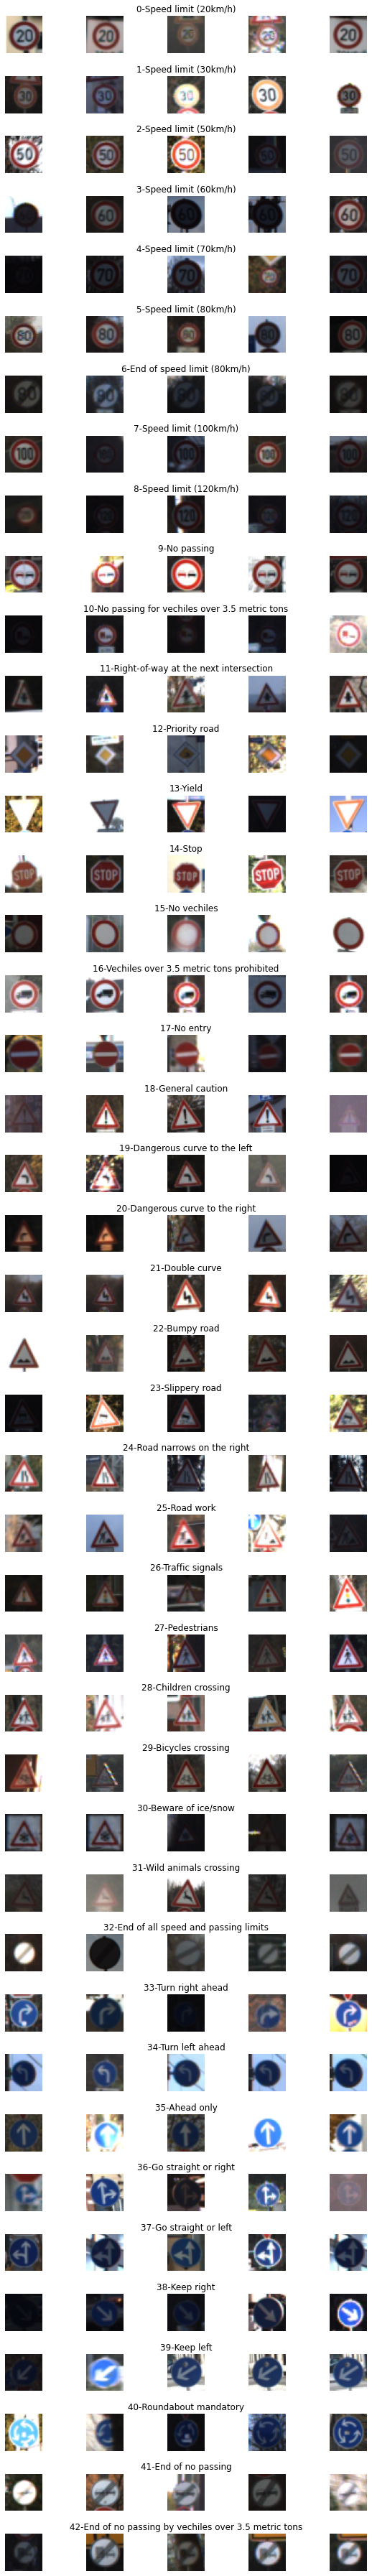

In [9]:
data_csv = pd.read_csv('/content/german-traffic-signs/signnames.csv')

num_of_samples = []

cols = 5
num_classes = 43

fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(8, 50))
fig.tight_layout()
for i in range(cols):
    for j, row in data_csv.iterrows():
        x_selected = X_train[y_train==j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i==2:
            axs[j][i].set_title(str(j) + "-" + row["SignName"])
            num_of_samples.append(len(x_selected))


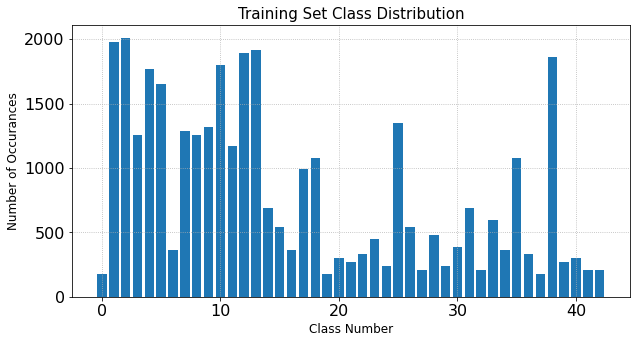

In [10]:
fig = plt.figure(0, figsize = (10,5))
unique_train, counts_train = np.unique(y_train, return_counts = True)
plt.bar(unique_train, counts_train)

plt.title('Training Set Class Distribution', fontsize=15)
plt.xlabel('Class Number', fontsize=12)
plt.ylabel('Number of Occurances', fontsize=12)
plt.tick_params(labelsize=16)
plt.grid(linestyle=':')

## Image Preprocessing

(32, 32, 3)
36


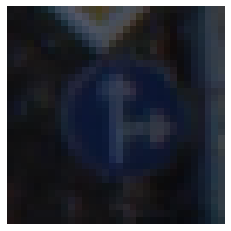

In [11]:
plt.imshow(X_train[1000])
plt.axis("off")
print(X_train[1000].shape)
print(y_train[1000])

In [12]:
def grayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img

(32, 32)


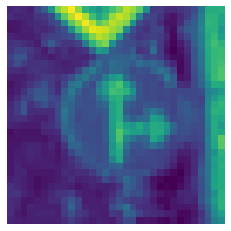

In [13]:
img = grayscale(X_train[1000])
plt.imshow(img)
plt.axis("off")
print(img.shape)

(32, 32)


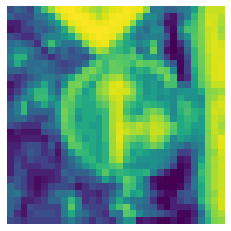

In [14]:
def equalize(img):
    img = cv2.equalizeHist(img)
    return img

img = equalize(img)
plt.imshow(img)
plt.axis("off")
print(img.shape)

In [15]:
# Mean Image RGB...
mean_image = np.mean(X_train, axis=0)
print(mean_image.shape)
dictionary = {'mean_image_rgb': mean_image}

# with open('mean_image_rgb' + '.pickle', 'wb') as f_mean_image:
#     pickle.dump(dictionary, f_mean_image)

(32, 32, 3)


(3, 32, 32)


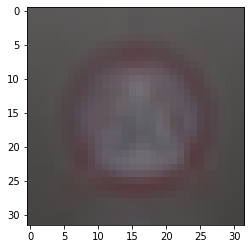

In [17]:
# Load mean_image file...
with open('mean_image_rgb.pickle', 'rb') as f:
    mean = pickle.load(f)
    
print(mean['mean_image_rgb'].shape)
mean_img = mean['mean_image_rgb'].reshape(32,32,3)
plt.imshow(mean_image.astype('uint8'))

In [18]:
def preprocessing(img):
    img = grayscale(img)
    img = equalize(img)
    img = img/255
    return img

X_train = np.array(list(map(preprocessing, X_train)))
X_val = np.array(list(map(preprocessing, X_val)))
X_test = np.array(list(map(preprocessing, X_test)))

In [24]:
# Mean Image Gray...
mean_image = np.mean(X_train, axis=0)
print(mean_image.shape)
dictionary = {'mean_image_gray': mean_image}

# # with open('mean_image_gray' + '.pickle', 'wb') as f_mean_image:
# #     pickle.dump(dictionary, f_mean_image)

(32, 32)


(1, 32, 32)


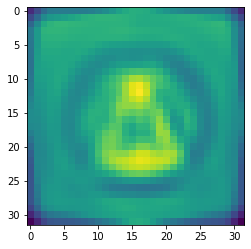

In [26]:
# Load mean_image file...
with open('mean_image_gray.pickle', 'rb') as f:
    mean = pickle.load(f)

print(mean['mean_image_gray'].shape)
mean_gr_img = mean['mean_image_gray'].reshape(32,32)
plt.imshow(mean_gr_img)

(34799, 32, 32)


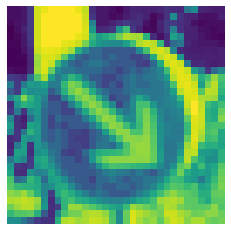

In [ ]:
plt.imshow(X_train[random.randint(0, len(X_train) - 1)])
plt.axis("off")
print(X_train.shape)

In [ ]:
X_train = X_train.reshape(34799, 32, 32, 1)
X_val = X_val.reshape(4410, 32, 32, 1)
X_test = X_test.reshape(12630, 32, 32, 1)

## Image Augmentation

In [ ]:
datagen = ImageDataGenerator(width_shift_range=0.1,
                             height_shift_range= 0.1,
                             zoom_range= 0.2,
                             shear_range= 0.1,
                             rotation_range=10)

datagen.fit(X_train)

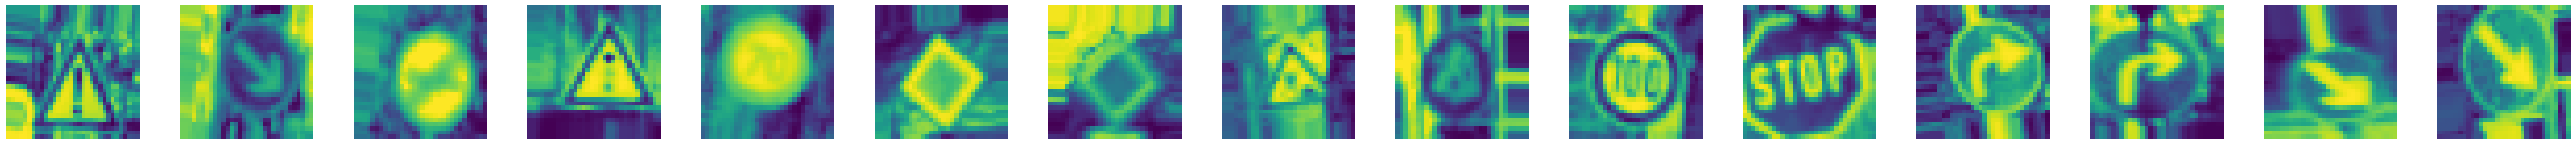

In [ ]:
batches = datagen.flow(X_train, y_train, batch_size=20)
X_batch, y_batch = next(batches)

fig, axs = plt.subplots(1, 15, figsize=(40, 8))
fig.tight_layout()

for i in range(15):
    axs[i].imshow(X_batch[i].reshape(32, 32))
    axs[i].axis("off")

In [ ]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(34799, 32, 32, 1)
(4410, 32, 32, 1)
(12630, 32, 32, 1)


In [ ]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)
y_val = to_categorical(y_val, 43)

## Model training

In [ ]:
input_img = Input(shape = (32, 32, 1))

In [ ]:
def conv2d_bn(x, filters, n_row, n_col, strides=(1, 1)):
    x = Conv2D(filters, (n_row ,n_col), padding='same', strides=strides)(x)
    x = BatchNormalization(axis=1, scale=False)(x)
    x = Activation('relu')(x)
    return x

In [ ]:
def inception_block(x):
    conv_6_1 = conv2d_bn(x, 64, 3, 1, strides=(1, 1))
    conv_7_1 = conv2d_bn(conv_6_1, 64, 1, 3, strides=(1, 1))
    conv_6_2 = conv2d_bn(x, 64, 1, 7, strides=(1, 1))
    conv_7_2 = conv2d_bn(conv_6_2, 64, 7, 1, strides=(1, 1))
    conv_6_3 = conv2d_bn(x, 64, 1, 5, strides=(1, 1))
    conv_7_3 = conv2d_bn(conv_6_3, 64, 5, 1, strides=(1, 1))

 
    x = concatenate([conv_7_1, conv_7_2, conv_7_3], axis=-1)
    return x

In [ ]:
def new_model():
    x = conv2d_bn(input_img, 60, 5, 5, strides=(1, 1))
    x = conv2d_bn(x, 60, 5, 5, strides=(1, 1))
    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)
    x = Dropout(rate=0.2)(x)
    x = inception_block(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)
    x = Dropout(rate=0.2)(x)
    x = conv2d_bn(x, 30, 3, 3, strides=(1, 1))
    x = conv2d_bn(x, 30, 3, 3, strides=(1, 1))
    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)
    x = Dropout(rate=0.3)(x)
    x = Flatten()(x)
    x = Dense(units=500, activation='relu')(x)
    x = Dropout(rate=0.5)(x) 
    x = Dense(units=43, activation='softmax')(x)
    
    return x

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 32, 32, 60)   1560        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 32, 32, 60)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 32, 32, 60)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

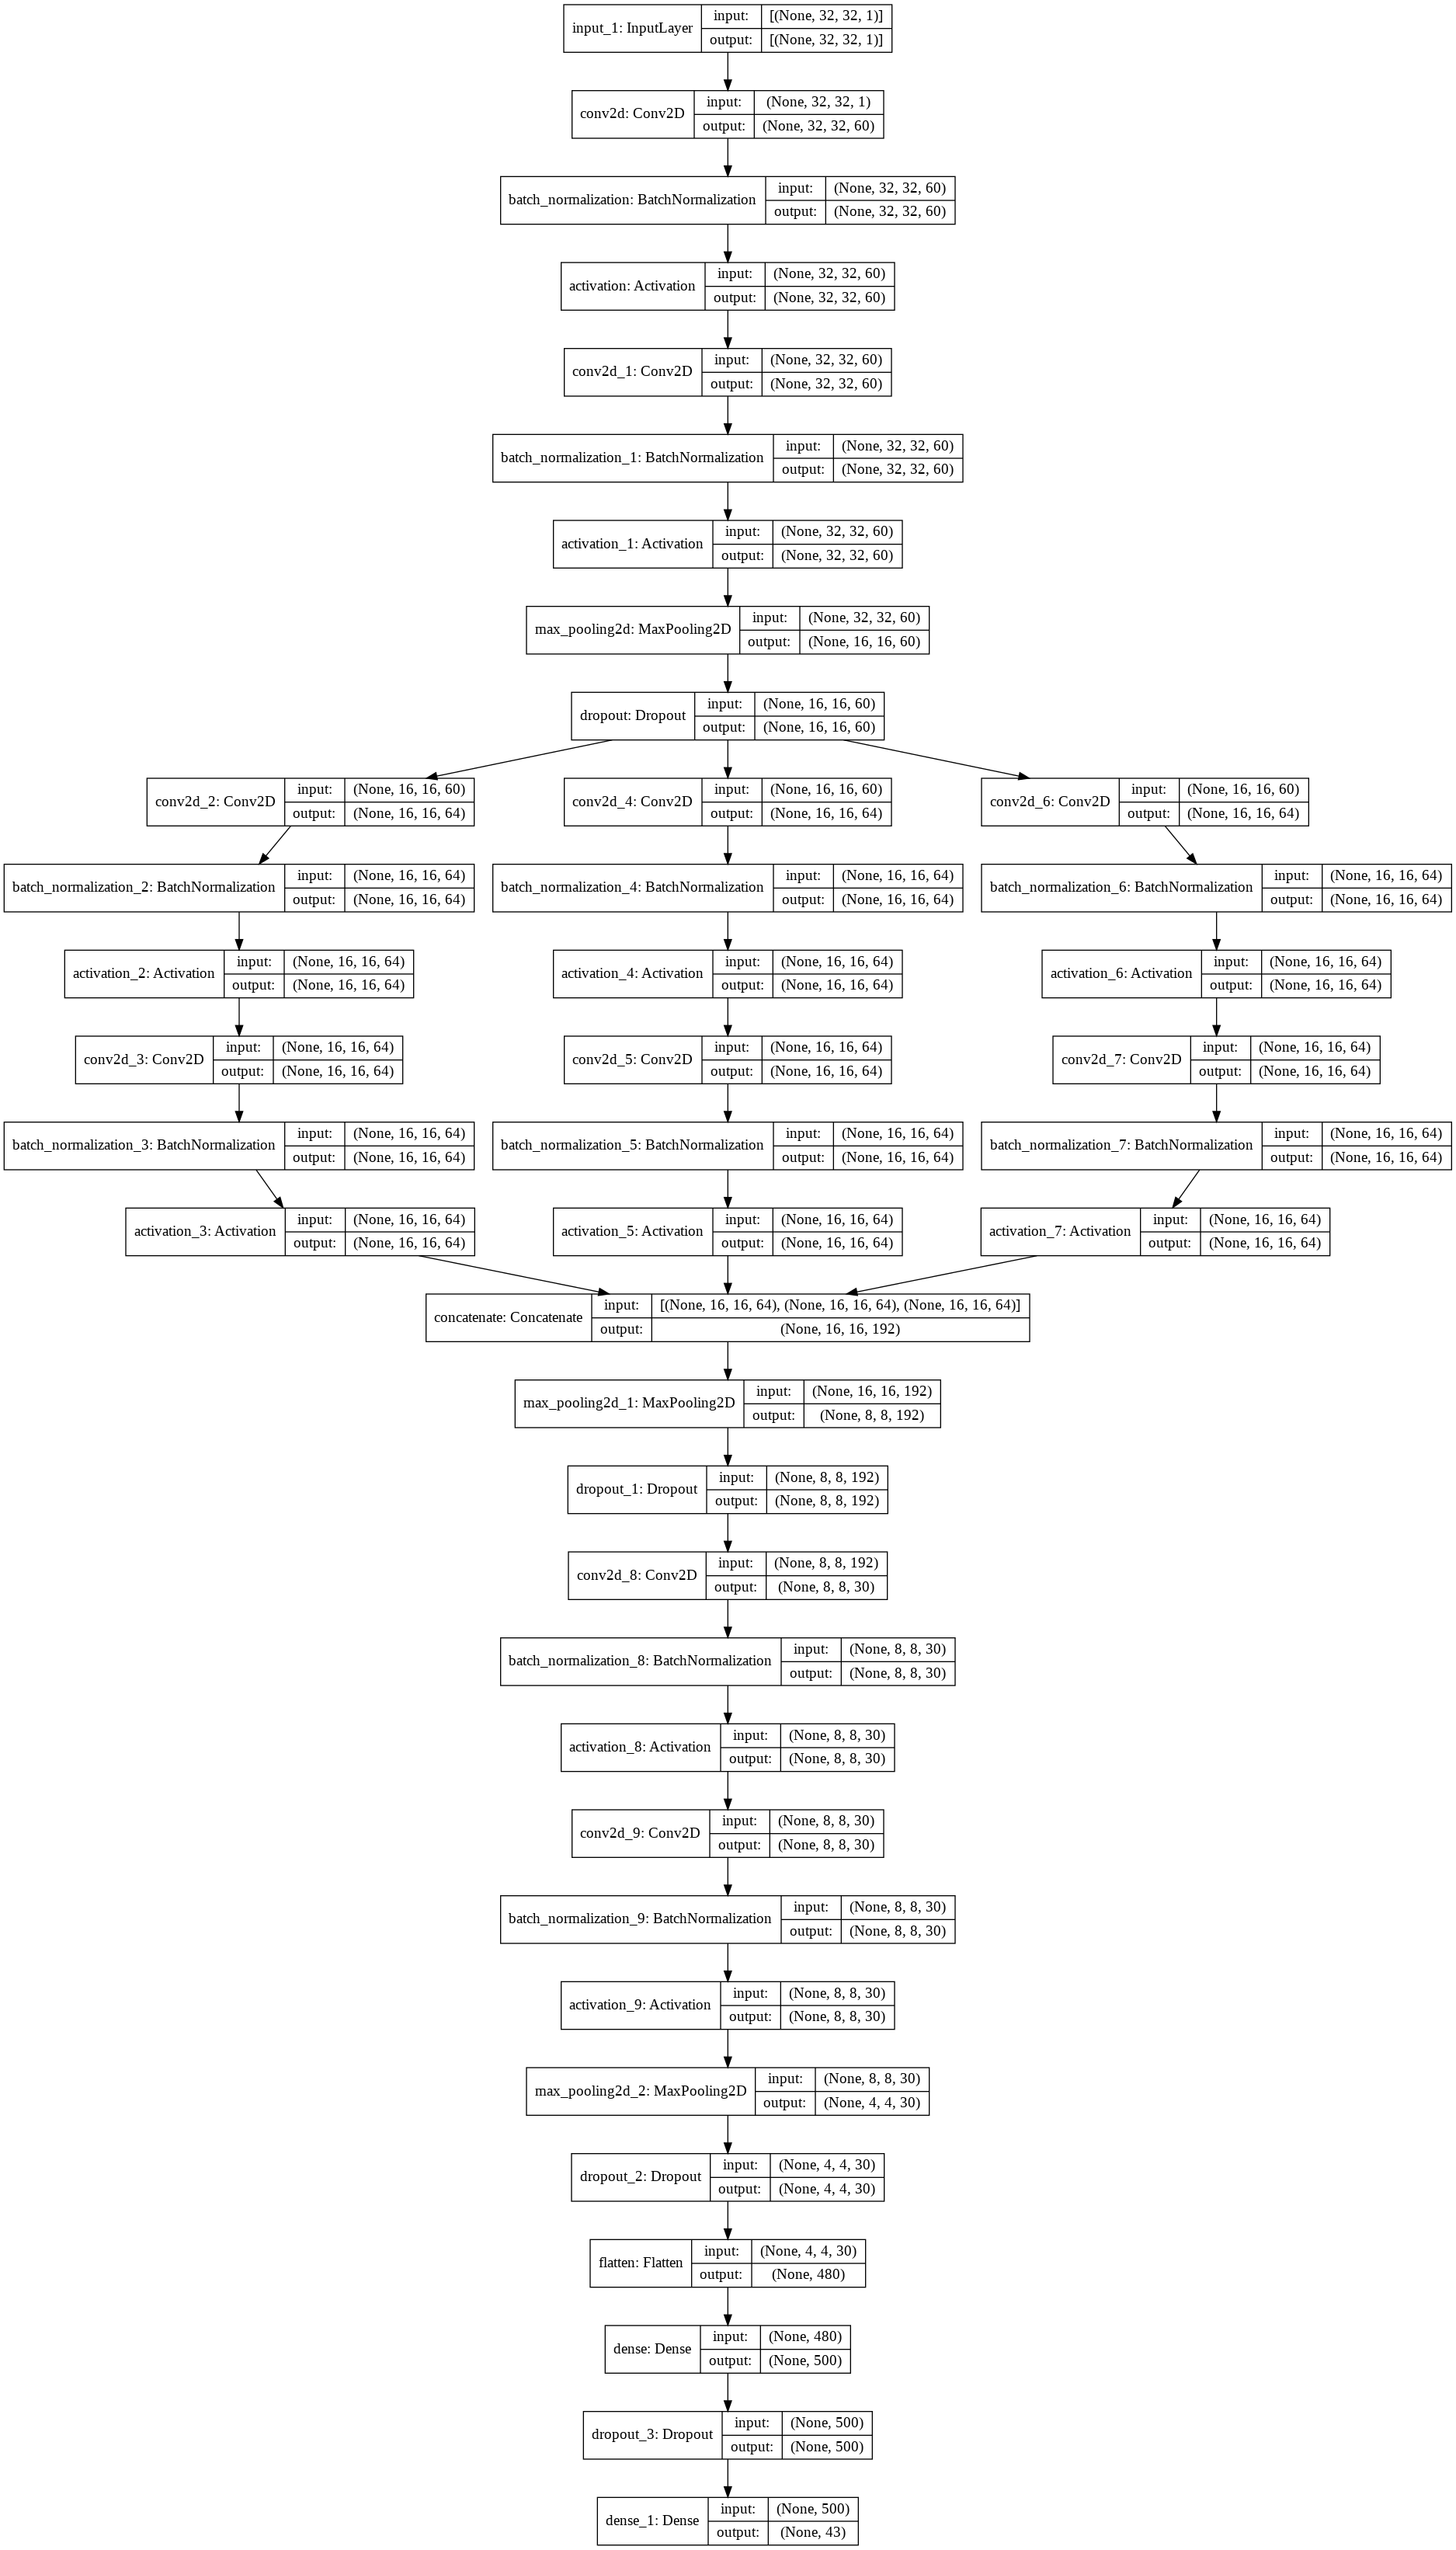

In [ ]:
model = Model(inputs = input_img, outputs = new_model())
print(model.summary())
plot_model(model, show_shapes=True, to_file='inception+mlenet_module.png')

In [ ]:
adam = Adam(learning_rate=0.001)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
batch_size = 16
h = model.fit(datagen.flow(X_train, y_train, batch_size=16), steps_per_epoch=int(len(X_train)/batch_size) , epochs=30, validation_data=(X_val, y_val), shuffle=1)

Epoch 1/30
2174/2174 [==============================] - 111s 28ms/step - loss: 3.2308 - accuracy: 0.1242 - val_loss: 1.2138 - val_accuracy: 0.6098
Epoch 2/30
2174/2174 [==============================] - 58s 27ms/step - loss: 1.3820 - accuracy: 0.5491 - val_loss: 0.3677 - val_accuracy: 0.8859
Epoch 3/30
2174/2174 [==============================] - 59s 27ms/step - loss: 0.6779 - accuracy: 0.7841 - val_loss: 0.1668 - val_accuracy: 0.9610
Epoch 4/30
2174/2174 [==============================] - 60s 27ms/step - loss: 0.4320 - accuracy: 0.8623 - val_loss: 0.0995 - val_accuracy: 0.9676
Epoch 5/30
2174/2174 [==============================] - 59s 27ms/step - loss: 0.3196 - accuracy: 0.8990 - val_loss: 0.0824 - val_accuracy: 0.9705
Epoch 6/30
2174/2174 [==============================] - 59s 27ms/step - loss: 0.2578 - accuracy: 0.9202 - val_loss: 0.0671 - val_accuracy: 0.9771
Epoch 7/30
2174/2174 [==============================] - 59s 27ms/step - loss: 0.2152 - accuracy: 0.9315 - val_loss: 0.0484 

## Model visualization and validation

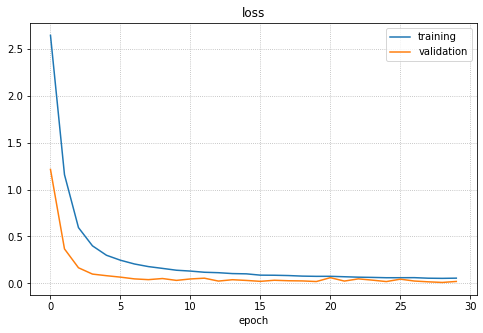

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('loss')
plt.xlabel('epoch')
plt.grid(linestyle=':')
plt.savefig("/content/loss_new.svg")

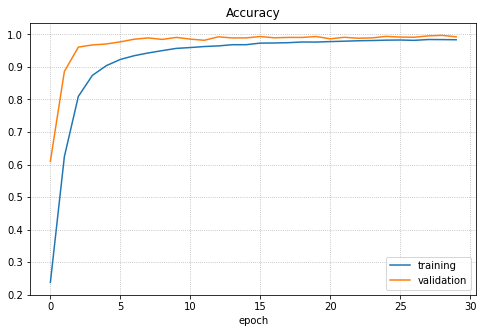

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.grid(linestyle=':')
plt.savefig("/content/acc_new.svg")

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: ', score[0])
print('Test Accuracy: ', score[1])

Test Score:  0.08721412718296051
Test Accuracy:  0.9781472682952881


## test image

In [ ]:
# https://c8.alamy.com/comp/G667W0/road-sign-speed-limit-30-kmh-zone-passau-bavaria-germany-G667W0.jpg

# https://c8.alamy.com/comp/A0RX23/cars-and-automobiles-must-turn-left-ahead-sign-A0RX23.jpg

# https://previews.123rf.com/images/bwylezich/bwylezich1608/bwylezich160800375/64914157-german-road-sign-slippery-road.jpg

# https://previews.123rf.com/images/pejo/pejo0907/pejo090700003/5155701-german-traffic-sign-no-205-give-way.jpg

# https://c8.alamy.com/comp/J2MRAJ/german-road-sign-bicycles-crossing-J2MRAJ.jpg



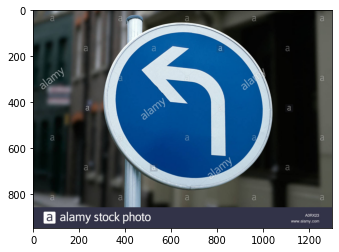

In [ ]:
import requests
from PIL import Image
url = 'https://c8.alamy.com/comp/A0RX23/cars-and-automobiles-must-turn-left-ahead-sign-A0RX23.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))


(32, 32)


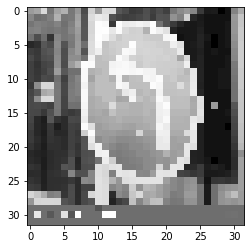

In [ ]:
#Preprocess image
 
img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocessing(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)

In [ ]:
#Reshape reshape
 
img = img.reshape(1, 32, 32, 1)

In [ ]:
#Test image
print("predicted sign: "+ str(np.argmax(model.predict(img))))

predicted sign: 34


(32, 32)
7


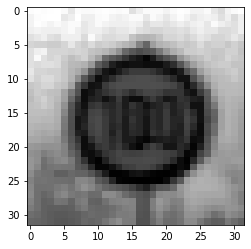

In [ ]:
img = X_test[13]
img = np.asarray(img)
img = cv2.resize(img, (32, 32))
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)
img = img.reshape(1, 32, 32, 1)
print(np.argmax(model.predict(img)))

## Save model

In [ ]:
model.save("/content/new_model.h5")

## Load model

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
#from tensorflow import ConfigProto
#from tensorflow import InteractiveSession
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [21]:
# import os
# os.chdir(r'D:\Study_3\GTSRB_new')
from keras.models import load_model
model = load_model('new_model.h5')

In [22]:
# dictionary
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)',
            2:'Speed limit (50km/h)',
            3:'Speed limit (60km/h)',
            4:'Speed limit (70km/h)',
            5:'Speed limit (80km/h)',
            6:'End of speed limit (80km/h)',
            7:'Speed limit (100km/h)',
            8:'Speed limit (120km/h)',
            9:'No passing',
            10:'No passing veh over 3.5 tons',
            11:'Right-of-way at intersection',
            12:'Priority road',
            13:'Yield',
            14:'Stop',
            15:'No vehicles',
            16:'Veh > 3.5 tons prohibited',
            17:'No entry',
            18:'General caution',
            19:'Dangerous curve left',
            20:'Dangerous curve right',
            21:'Double curve',
            22:'Bumpy road',
            23:'Slippery road',
            24:'Road narrows on the right',
            25:'Road work',
            26:'Traffic signals',
            27:'Pedestrians',
            28:'Children crossing',
            29:'Bicycles crossing',
            30:'Beware of ice/snow',
            31:'Wild animals crossing',
            32:'End speed + passing limits',
            33:'Turn right ahead',
            34:'Turn left ahead',
            35:'Ahead only',
            36:'Go straight or right',
            37:'Go straight or left',
            38:'Keep right',
            39:'Keep left',
            40:'Roundabout mandatory',
            41:'End of no passing',
            42:'End no passing veh > 3.5 tons' }

## Model testing

In [23]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def test_on_img(img):
    data = []
    image = cv2.imread(img)
    image = np.asarray(image)
    image = cv2.resize(image, (32,32))
    image = preprocessing(image)
    print(image.shape)
    image = np.array(image)
    data.append(image)
    x_test = np.array(data)
    x_test = x_test.reshape((1, 32, 32, 1))
    y_pred = model.predict(x_test)
    print(x_test.shape)
    return image, y_pred


(32, 32)
(1, 32, 32, 1)
Predicted traffic sign is :  Ahead only


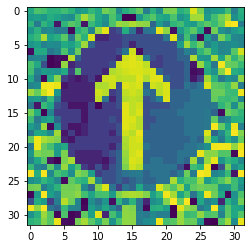

In [34]:
plot, prediction = test_on_img('ahead_new.jpg')
prediction = np.argmax(prediction)
print("Predicted traffic sign is : ", classes[prediction])
plt.imshow(plot)
plt.show()

(32, 32)
(1, 32, 32, 1)
Predicted traffic sign is :  Speed limit (70km/h)


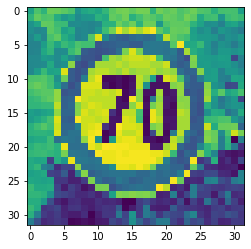

In [35]:
plot, prediction = test_on_img('web_new.png')
prediction = np.argmax(prediction)
print("Predicted traffic sign is : ", classes[prediction])
plt.imshow(plot)
plt.show()

(32, 32)
(1, 32, 32, 1)
Predicted traffic sign is :  No passing


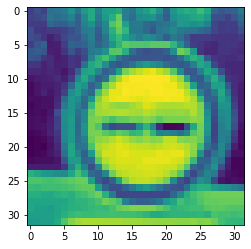

In [36]:
plot, prediction = test_on_img('00053.png')
prediction = np.argmax(prediction)
print("Predicted traffic sign is : ", classes[prediction])
plt.imshow(plot)
plt.show()

In [ ]:
# https://c8.alamy.com/comp/G667W0/road-sign-speed-limit-30-kmh-zone-passau-bavaria-germany-G667W0.jpg

# https://c8.alamy.com/comp/A0RX23/cars-and-automobiles-must-turn-left-ahead-sign-A0RX23.jpg

# https://previews.123rf.com/images/bwylezich/bwylezich1608/bwylezich160800375/64914157-german-road-sign-slippery-road.jpg

# https://previews.123rf.com/images/pejo/pejo0907/pejo090700003/5155701-german-traffic-sign-no-205-give-way.jpg

# https://c8.alamy.com/comp/J2MRAJ/german-road-sign-bicycles-crossing-J2MRAJ.jpg



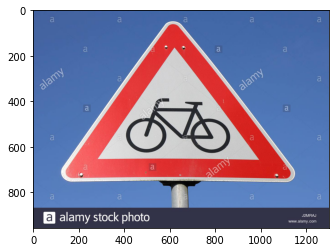

In [37]:
import requests
from PIL import Image
url = 'https://c8.alamy.com/comp/J2MRAJ/german-road-sign-bicycles-crossing-J2MRAJ.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))


(32, 32)


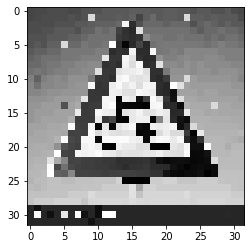

In [41]:
#Preprocess image
 
img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocessing(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)

In [42]:
#Reshape reshape
 
img = img.reshape(1, 32, 32, 1)

In [43]:
#Test image
print("predicted sign: "+ classes[(np.argmax(model.predict(img)))])


predicted sign: Bicycles crossing


## Confusion Matrix evaluation

In [1]:
from sklearn import metrics

In [19]:
print(X_test.shape)

(12630, 32, 32)


In [24]:
y_pred = model.predict(X_test)
y_preds = np.argmax(y_pred,axis=1)

In [25]:
# Printing the confusion matrix
mat = metrics.confusion_matrix(y_test, y_preds)
print(mat)

[[ 60   0   0 ...   0   0   0]
 [  0 710   0 ...   0   0   0]
 [  0   1 747 ...   0   0   0]
 ...
 [  0   2   0 ...  82   0   0]
 [  0   0   0 ...   0  58   0]
 [  0   0   0 ...   6   0  84]]


In [26]:
# Printing the precision and recall, among other metrics
print(metrics.classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       0.99      0.99      0.99       720
           2       0.98      1.00      0.99       750
           3       0.94      0.99      0.96       450
           4       0.98      0.99      0.99       660
           5       0.99      0.91      0.95       630
           6       1.00      0.86      0.92       150
           7       0.98      1.00      0.99       450
           8       0.99      0.97      0.98       450
           9       0.98      1.00      0.99       480
          10       1.00      0.99      0.99       660
          11       0.95      0.93      0.94       420
          12       0.98      1.00      0.99       690
          13       0.99      1.00      0.99       720
          14       1.00      1.00      1.00       270
          15       0.95      1.00      0.97       210
          16       1.00      1.00      1.00       150
          17       1.00    

In [27]:
import pandas as pd
import seaborn as sn

data = {'y_Actual':    y_test,
        'y_Predicted': y_preds}

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'], margins = True)


In [28]:
FP = mat.sum(axis=1) - np.diag(mat)  
FN = mat.sum(axis=0) - np.diag(mat)
TP = np.diag(mat)
TN = mat.sum() - (FP + FN + TP)

In [29]:
print(TP)
print(FP)
# print(TN)
print(FN)

[ 60 710 747 446 654 576 129 448 435 480 651 390 688 720 270 209 150 355
 355  60  90  69 120 149  90 478 179  54 149  90 137 265  60 210 120 387
 120  59 682  89  82  58  84]
[ 0 10  3  4  6 54 21  2 15  0  9 30  2  0  0  1  0  5 35  0  0 21  0  1
  0  2  1  6  1  0 13  5  0  0  0  3  0  1  8  1  8  2  6]
[ 0  9 15 29 10  4  0 11  4 10  0 21 12  9  1 10  0  0  3  6  4  4  8  3
  8  5  7 19  6  3 18  0 18  3  5  2  1  0  0  1  7  0  0]


In [30]:
print(TP.sum())
print(FP.sum())
# print(TN)
print(FN.sum())

12354
276
276


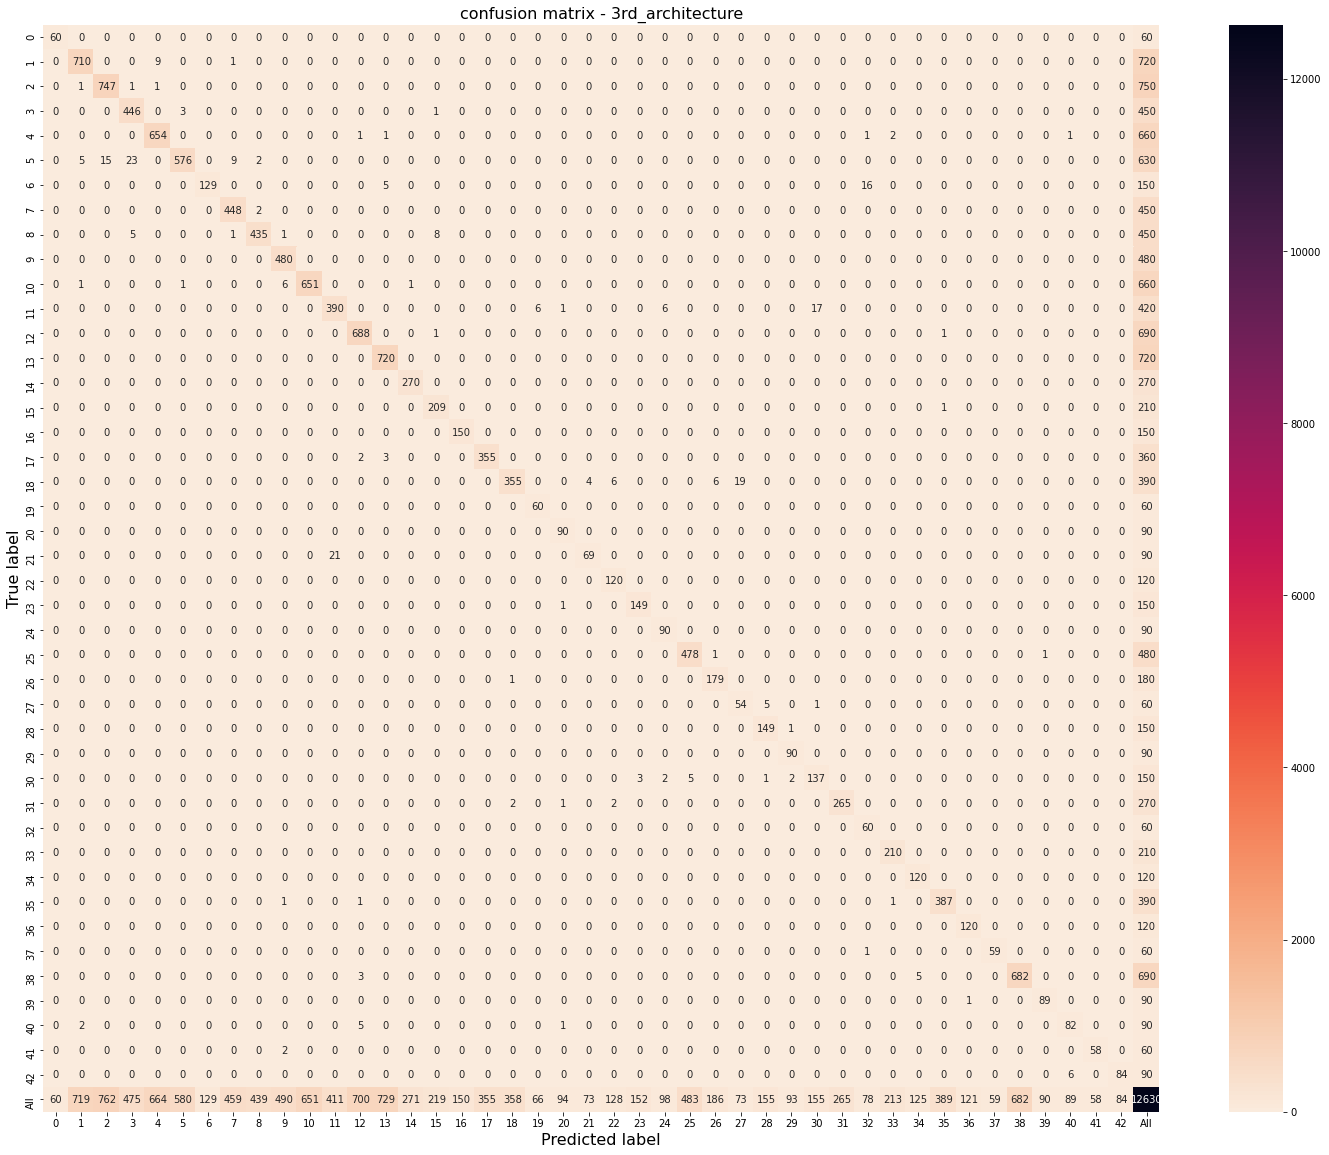

In [33]:
fig = plt.figure()
fig = plt.gcf()
fig.set_size_inches(25, 20)
sn.heatmap(confusion_matrix, annot=True, fmt = 'd', cmap = 'rocket_r')
plt.ylabel('True label', fontsize=16)  # Axis label
plt.xlabel('Predicted label', fontsize=16)  # Axis label
plt.title('confusion matrix - 3rd_architecture', fontsize=16) 
plt.show()